# Self Employment Data 2015
from [OECD](https://data.oecd.org/emp/self-employment-rate.htm#indicator-chart)

In [1]:
countries = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'FIN', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 
             'KOR', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 
             'USA', 'CHL', 'COL', 'EST', 'ISR', 'RUS', 'SVN', 'EU28', 'EA19', 'LVA']

male_selfemployment_rates = [12.13246, 15.39631, 18.74896, 9.18314, 20.97991, 18.87097, 
                             13.46109, 39.34802, 13.3356, 16.83681, 25.35344, 29.27118, 
                             12.06516, 27.53898, 31.6945, 19.81751, 17.68489, 9.13669, 
                             24.15699, 22.95656, 19.00245, 21.16428, 13.93171, 8.73181, 
                             30.73483, 19.11255, 7.48383, 25.92752, 52.27145, 12.05042, 
                             15.8517, 8.10048, 19.02411, 19.59021, 19.1384, 14.75558]

female_selfemployment_rates = [8.18631, 10.38607, 11.07756, 8.0069, 12.78461, 
                               9.42761, 7.75637, 29.56566, 8.00408, 7.6802, 8.2774, 18.33204, 
                               9.7313, 23.56431, 32.81488, 13.36444, 11.50045, 4.57464, 
                               17.63891, 13.92678, 10.32846, 12.82925, 6.22453, 9.28793, 
                               38.32216, 10.21743, 5.2896, 25.24502, 49.98448, 6.624, 
                               9.0243, 6.26909, 13.46641, 11.99529, 11.34129, 8.88987]

countries_by_continent = {'AUS':'AUS', 'AUT':'EUR', 'BEL':'EUR', 'CAN':'AM', 
                          'CZE':'EUR', 'FIN':'EUR', 'DEU':'EUR', 'GRC':'EUR', 
                          'HUN':'EUR', 'ISL':'EUR', 'IRL':'EUR', 'ITA':'EUR', 
                          'JPN':'AS',  'KOR':'AS',  'MEX':'AM',  'NLD':'EUR', 
                          'NZL':'AUS', 'NOR':'EUR', 'POL':'EUR', 'PRT':'EUR', 
                          'SVK':'EUR', 'ESP':'EUR', 'SWE':'EUR', 'CHE':'EUR', 
                          'TUR':'EUR', 'GBR':'EUR', 'USA':'AM' , 'CHL':'AM', 
                          'COL':'AM' , 'EST':'EUR', 'ISR':'AS',  'RUS':'EUR', 
                          'SVN':'EUR', 'EU28':'EUR','EA19':'AS', 'LVA':'EUR'}

In [2]:
import pandas as pd

df_male_selfemployment_rates = pd.DataFrame({'countries':countries, 'selfemployment_rates':male_selfemployment_rates})
df_male_selfemployment_rates.head()

,countries,selfemployment_rates
0,AUS,12.13246
1,AUT,15.39631
2,BEL,18.74896
3,CAN,9.18314
4,CZE,20.97991


In [3]:
df_female_selfemployment_rates = pd.DataFrame({'countries':countries, 'selfemployment_rates':female_selfemployment_rates})
df_female_selfemployment_rates.head()

,countries,selfemployment_rates
0,AUS,8.18631
1,AUT,10.38607
2,BEL,11.07756
3,CAN,8.00690
4,CZE,12.78461


In [4]:
df_country_continent = pd.DataFrame(list(countries_by_continent.items()), columns=['country','continent'])
df_country_continent.head()

,country,continent
0,AUS,AUS
1,AUT,EUR
2,BEL,EUR
3,CAN,AM
4,CZE,EUR


# Solutions with Pandas

## Basic Calculations and Statistics

### Exercise 1

Calculate for each country the overallselfemployment_rate:<br>
`df_selfemployment_rate:=(male_selfemployment_rates+female_selfemployment_rates)/2`

(assumes that #women ~#men)

In [5]:
# TODO
# 1. merge df_male+df_female
# 2. calculate

df_ser = df_male_selfemployment_rates.merge( \
                                df_female_selfemployment_rates, \
                                on='countries', suffixes=('_m','_f'))

df_ser['avg']=(df_ser.selfemployment_rates_f+df_ser.selfemployment_rates_m)/2



df_ser.rename(columns={'selfemployment_rates_f':'f', \
                      'selfemployment_rates_m':'m'}, inplace=True)

In [6]:
df_ser.head()

,countries,m,f,avg
0,AUS,12.13246,8.18631,10.159385
1,AUT,15.39631,10.38607,12.891190
2,BEL,18.74896,11.07756,14.913260
3,CAN,9.18314,8.00690,8.595020
4,CZE,20.97991,12.78461,16.882260


### Exercise 2
Calculate
- maximum
- minimum
- sum
- mean
- standard deviation

for/of all selfemployment_rates.

In [7]:
# TODO
print(df_ser.avg.max())
print(df_ser.avg.min())
print(df_ser.avg.sum())
print(df_ser.avg.mean())
print(df_ser.avg.std())

51.127965
6.386715
603.390065
16.7608351389
9.34603245614


### Exercise 3
Find the Country with the highest `selfemployment_rate`.

In [8]:
# TODO
df_ser.countries[df_ser.avg.argmax()]

'COL'

### Exercise 4
Find the the sum of all `selfemployment_rate`s, which are between `10-15`.

In [9]:
# TODO
df_ser.avg[(df_ser.avg>=10) & (df_ser.avg<=15)].sum()


174.81038999999996

### Exercise 5
a) Plot a barchart of the `selfemployment_rate`s by country (as in [Basic-Plotting]. Use [pandas plotting facilities](https://pandas.pydata.org/pandas-docs/stable/visualization.html)).

Use [`Pandas set_index`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html?highlight=set_index) to get the labeling in place.

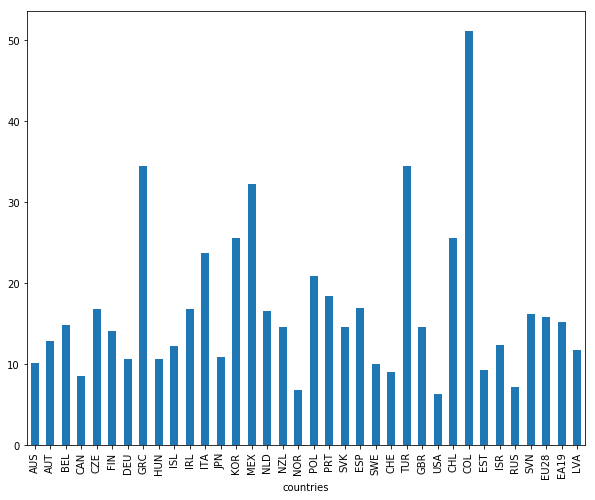

In [10]:
# TODO
import matplotlib.pyplot as plt
%matplotlib inline

df_idx_country = df_ser.set_index('countries')
df_idx_country.head()
df_idx_country.avg.plot.bar(figsize=(10,8));

b) Plot a barchart of the male vs. female `selfemployment_rate`s by country (as in [Basic-Plotting](../1/5-Basic-Plotting-Exercise.ipynb), but using [pandas plotting facilities](https://pandas.pydata.org/pandas-docs/stable/visualization.html)).

Use [`Pandas set_index`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html?highlight=set_index) to get the labeling in place.

Set meaningful labels (by [renaming the columns]())

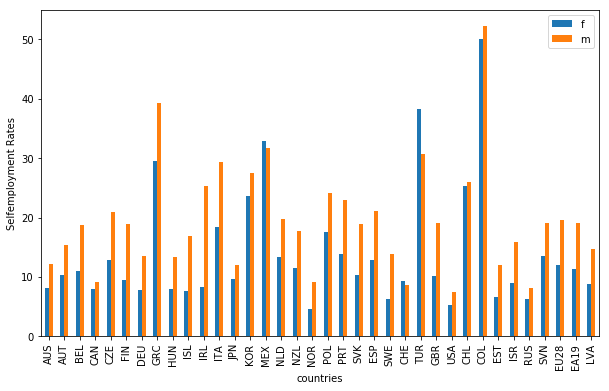

In [13]:
# TODO
df_idx_country[['f','m']].plot.bar(figsize=(10,6))
plt.ylabel('Selfemployment Rates');

## Aggregetions

### Exercise 6
Calculate the mean of the selfemployment-rates per continent.

In [12]:
# TODO group by Continent
# 1. merge country-countries
# 2. group by continent
# 3. get mean
df_all=pd.merge(df_ser, df_country_continent, left_on='countries', right_on='country')
df_all.groupby('continent')['avg'].mean()

continent
AM     24.790132
AS     16.031930
AUS    12.376027
EUR    15.622385
Name: avg, dtype: float64